## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


2024-07-23 10:28:51.403557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)



(50000, 32, 32, 3)


In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


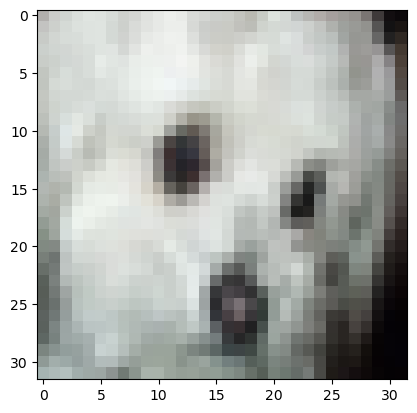

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2246])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


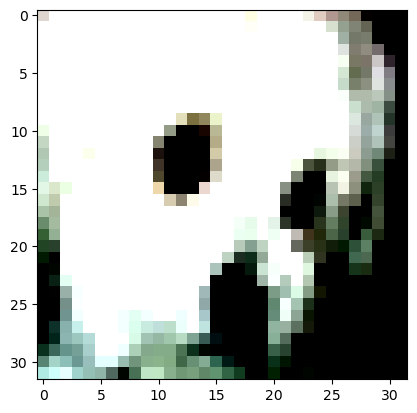

In [26]:

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 
plt.imshow(x_train[2246])
plt.show()

In [27]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

In [28]:
# 查看转换后的结果
print(y_train.shape)  # 应该是 (50000, 10)
print(y_test.shape)   # 应该是 (10000, 10)

(50000, 10)
(10000, 10)


In [4]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
#one_hot=OneHotEncoder()
#y_train=one_hot.fit_transform(y_train).toarray()
#y_test=one_hot.transform(y_test).toarray()

## 创建 OneHotEncoder 实例
#one_hot = OneHotEncoder(sparse=False, categories='auto')

## 对 y_train 和 y_test 进行 One-Hot 编码
## 注意：需要将 y_train 和 y_test 重新塑形为 (n_samples, 1) 的形式
#y_train = one_hot.fit_transform(y_train.reshape(-1, 1))
#y_test = one_hot.transform(y_test.reshape(-1, 1))

## 查看转换后的结果
#print(y_train.shape)  # 应该是 (50000, 10)
#print(y_test.shape)   # 应该是 (10000, 10)

(50000, 10)
(10000, 10)


/Users/shiauchen/opt/anaconda3/envs/pycourse/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:

classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())

#'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D())

#卷積組合
classifier.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
classifier.add(BatchNormalization())
#classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(units=100, activation='relu')) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(units=10, activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
500/500 [==============================] - 67s 132ms/step - loss: 1.2974 - accuracy: 0.5617
Epoch 2/10
500/500 [==============================] - 69s 139ms/step - loss: 0.7841 - accuracy: 0.7251
Epoch 3/10
500/500 [==============================] - 67s 135ms/step - loss: 0.5611 - accuracy: 0.8051
Epoch 4/10
500/500 [==============================] - 71s 142ms/step - loss: 0.3873 - accuracy: 0.8674
Epoch 5/10
500/500 [==============================] - 68s 136ms/step - loss: 0.2590 - accuracy: 0.9126
Epoch 6/10
500/500 [==============================] - 66s 132ms/step - loss: 0.1823 - accuracy: 0.9378
Epoch 7/10
500/500 [==============================] - 67s 134ms/step - loss: 0.1469 - accuracy: 0.9499
Epoch 8/10
500/500 [==============================] - 66s 133ms/step - loss: 0.1142 - accuracy: 0.9605
Epoch 9/10
500/500 [==============================] - 65s 130ms/step - loss: 0.0993 - accuracy: 0.9655
Epoch 10/10
500/500 [==============================] - 63s 127ms/step - l

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [30]:
#input_example=(x_test-mean_train)/(std_train+1e-7) 
predictions = classifier.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [31]:
from sklearn.metrics import accuracy_score
import numpy as np

# 预测测试集
#predictions = classifier.predict(x_test)

# 将预测结果转换为类别索引
predicted_classes = np.argmax(predictions, axis=1)

# 将真实标签转换为类别索引
true_classes = np.argmax(y_test, axis=1)

# 计算准确率
accuracy = accuracy_score(true_classes, predicted_classes)

# 打印准确率
print(f'Test accuracy: {accuracy:.2%}')

Test accuracy: 65.28%


In [32]:
# 评估模型在测试集上的性能
loss, accuracy = classifier.evaluate(x_test, y_test)

# 打印准确率
print(f'Test accuracy: {accuracy:.2%}')

313/313 [==============================] - 5s 14ms/step - loss: 2.1317 - accuracy: 0.6528
Test accuracy: 65.28%
